In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
noaa_precip_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
ecmwf_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
noaa_sst_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")

In [3]:
print("NOAA_PRECIP:",noaa_precip_ds)
print("\n ECMWF:" ,ecmwf_ds)
print("\n NOAA_SST:",noaa_sst_ds)

NOAA_PRECIP: <xarray.Dataset>
Dimensions:    (lat: 3, lon: 3, time: 73, nv: 2)
Coordinates:
  * lat        (lat) float32 16.25 18.75 21.25
  * lon        (lon) float32 68.75 71.25 73.75
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2025-01-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www

In [4]:
def dataset_info(ds):
    print("=== Dataset Summary ===")
    # Print dimensions using ds.sizes to avoid FutureWarning
    print("Dimensions:")
    for dim, size in ds.sizes.items():
        print(f"  {dim}: {size}")

    print("\nCoordinates:")
    for coord in ds.coords:
        coord_vals = ds[coord].values
        sample = coord_vals if coord_vals.size <= 10 else coord_vals.flat[:10]
        print(f"  {coord}: {sample}")

    print("\nData Variables:")
    for var in ds.data_vars:
        data = ds[var]
        print(f"\n--- Variable: {var} ---")
        print("Shape:", data.shape)
        arr = data.values

        # Count NaNs (if the array is numeric)
        if np.issubdtype(arr.dtype, np.number):
            n_nan = np.isnan(arr).sum()
            print("Number of NaNs:", n_nan)
        else:
            print("Non-numeric data, skipping NaN count.")

        # Unique values (if not too many)
        try:
            unique_vals = np.unique(arr[~np.isnan(arr)]) if np.issubdtype(arr.dtype, np.number) else np.unique(arr)
            if unique_vals.size > 20:
                print("Unique values (first 20):", unique_vals[:20])
            else:
                print("Unique values:", unique_vals)
        except Exception as e:
            print("Could not compute unique values due to:", e)

        # If the variable is numeric, compute basic statistics; skip for datetime types
        if np.issubdtype(arr.dtype, np.datetime64):
            print("Datetime variable; skipping numerical statistics.")
        elif np.issubdtype(arr.dtype, np.number):
            print("Min:", np.nanmin(arr))
            print("Max:", np.nanmax(arr))
            print("Mean:", np.nanmean(arr))
            print("Std:", np.nanstd(arr))
        else:
            print("Non-numeric variable; statistics not applicable.")

        print("-" * 40)

# Example usage for each dataset:

# NOAA PRECIP dataset
noaa_precip = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
print("NOAA PRECIP Dataset Info:")
dataset_info(noaa_precip)
print("\n\n")

# ECMWF dataset
ecmwf = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
print("ECMWF Dataset Info:")
dataset_info(ecmwf)
print("\n\n")

# NOAA SST dataset
noaa_sst = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")
print("NOAA SST Dataset Info:")
dataset_info(noaa_sst)
print("\n\n")

NOAA PRECIP Dataset Info:
=== Dataset Summary ===
Dimensions:
  lat: 3
  lon: 3
  time: 73
  nv: 2

Coordinates:
  lat: [16.25 18.75 21.25]
  lon: [68.75 71.25 73.75]
  time: ['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000']

Data Variables:

--- Variable: time_bnds ---
Shape: (73, 2)
Non-numeric data, skipping NaN count.
Unique values (first 20): ['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:0

# correlation matrix method


In [6]:
noaa_precip_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\precip_konkan.nc")
ecmwf_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\ECMWF - skt , v10 ,u10 , msl ,tcc , 2m temp.nc")
noaa_sst_ds = xr.open_dataset(r"C:\Users\Admin\RIYA PROJECT\DATASETS\main datasets to use\noaa_sst_masked.nc")

# Compute spatial averages:
# NOAA Precipitation (dimensions: time, lat, lon)
noaa_precip = noaa_precip_ds['precip'].mean(dim=['lat', 'lon'])
# NOAA SST (dimensions: time, lat, lon)
noaa_sst = noaa_sst_ds['sst'].mean(dim=['lat', 'lon'])
# ECMWF variables (dimensions: valid_time, latitude, longitude)
# Rename the coordinate 'valid_time' to 'time' for merging without altering variable names
ecmwf_msl = ecmwf_ds['msl'].mean(dim=['latitude', 'longitude']).rename({'valid_time': 'time'})
ecmwf_tcc = ecmwf_ds['tcc'].mean(dim=['latitude', 'longitude']).rename({'valid_time': 'time'})
ecmwf_u10 = ecmwf_ds['u10'].mean(dim=['latitude', 'longitude']).rename({'valid_time': 'time'})
ecmwf_v10 = ecmwf_ds['v10'].mean(dim=['latitude', 'longitude']).rename({'valid_time': 'time'})
ecmwf_t2m = ecmwf_ds['t2m'].mean(dim=['latitude', 'longitude']).rename({'valid_time': 'time'})


# Convert each DataArray to a pandas Series
series_noaa_precip = noaa_precip.to_series()
series_noaa_sst = noaa_sst.to_series()
series_ecmwf_msl = ecmwf_msl.to_series()
series_ecmwf_tcc = ecmwf_tcc.to_series()
series_ecmwf_u10 = ecmwf_u10.to_series()
series_ecmwf_v10 = ecmwf_v10.to_series()
series_ecmwf_t2m = ecmwf_t2m.to_series()


# Merge all series into a single DataFrame using an outer join on the time index
df = pd.concat([
    series_noaa_precip,
    series_noaa_sst,
    series_ecmwf_msl,
    series_ecmwf_tcc,
    series_ecmwf_u10,
    series_ecmwf_v10,
    series_ecmwf_t2m,
    
], axis=1)

# Set column names; ECMWF variables keep their original names.
df.columns = ['noaa_precip', 'noaa_sst', 'msl', 'tcc', 'u10', 'v10', 't2m']

# Compute the correlation matrix (NaNs will be handled pairwise)
corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
             noaa_precip  noaa_sst       msl       tcc       u10       v10  \
noaa_precip     1.000000  0.430773 -0.838793  0.928950  0.742883  0.896493   
noaa_sst        0.430773  1.000000 -0.728623  0.486251  0.486223  0.633197   
msl            -0.838793 -0.728623  1.000000 -0.845315 -0.868664 -0.927403   
tcc             0.928950  0.486251 -0.845315  1.000000  0.720833  0.896235   
u10             0.742883  0.486223 -0.868664  0.720833  1.000000  0.842220   
v10             0.896493  0.633197 -0.927403  0.896235  0.842220  1.000000   
t2m             0.266709  0.932240 -0.637735  0.321915  0.421188  0.494407   

                  t2m  
noaa_precip  0.266709  
noaa_sst     0.932240  
msl         -0.637735  
tcc          0.321915  
u10          0.421188  
v10          0.494407  
t2m          1.000000  


The mosdac rows and columns are empty because it has 100% NaN values


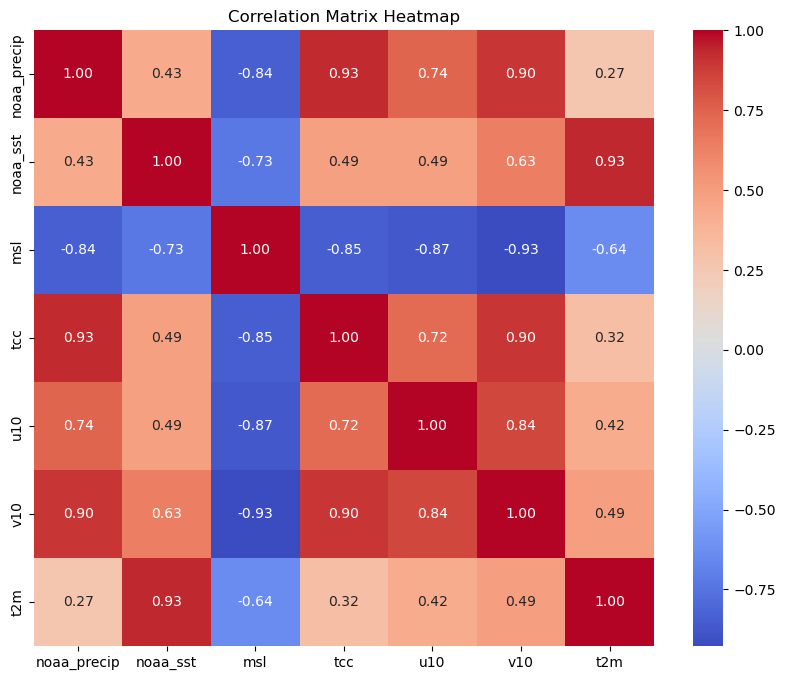

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("The mosdac rows and columns are empty because it has 100% NaN values")
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()